<a href="https://colab.research.google.com/github/MOHAMEDANASM10/Student_performance_prediction/blob/main/Student_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Performance Prediction using Logistic Regression

This notebook builds a logistic regression model to predict whether a student will pass or fail based on study hours and attendance. It includes interactive input from the user at the end.

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Step 2: Create a larger dataset manually
data = {
    'Hours_Studied': [5, 2, 4, 1, 6, 3, 7, 2.5, 5.5, 1.5, 8, 3.5, 6.5, 4.5, 0.5, 7.5, 2, 4, 3, 1],
    'Attendance': [85, 60, 75, 50, 90, 65, 95, 55, 88, 45, 98, 68, 92, 78, 35, 97, 58, 70, 62, 40],
    'Pass_Fail': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0]
}

df = pd.DataFrame(data)
df


,Hours_Studied,Attendance,Pass_Fail
0,5.0,85,1
1,2.0,60,0
2,4.0,75,1
3,1.0,50,0
4,6.0,90,1
5,3.0,65,0
6,7.0,95,1
7,2.5,55,0
8,5.5,88,1
9,1.5,45,0


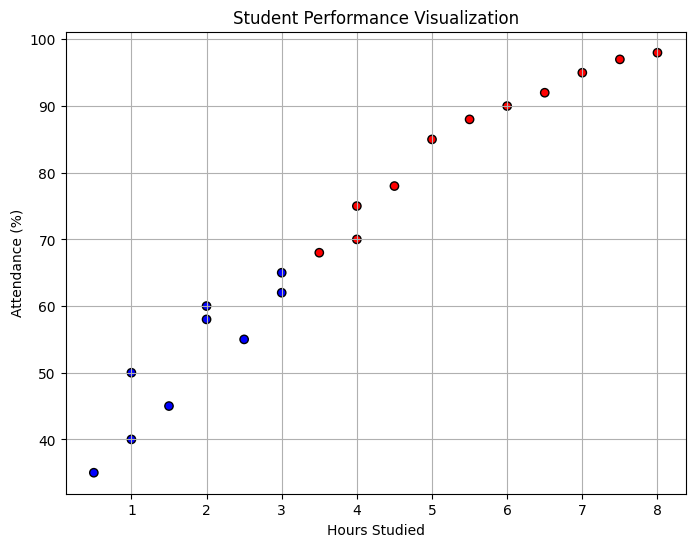

In [3]:
# Step 3: Visualize the dataset
plt.figure(figsize=(8,6))
plt.scatter(df['Hours_Studied'], df['Attendance'], c=df['Pass_Fail'], cmap='bwr', edgecolors='k')
plt.xlabel('Hours Studied')
plt.ylabel('Attendance (%)')
plt.title('Student Performance Visualization')
plt.grid(True)
plt.show()


In [4]:
# Step 4: Split data into training and testing sets
X = df[['Hours_Studied', 'Attendance']]
y = df['Pass_Fail']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
# Step 5: Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [6]:
# Step 6: Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[2 0]
 [0 4]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [7]:
# Step 7: Predict on user input data
try:
    hrs = float(input("Enter hours studied: "))
    att = float(input("Enter attendance percentage: "))

    user_input = pd.DataFrame({'Hours_Studied': [hrs], 'Attendance': [att]})
    result = model.predict(user_input)

    print("\nPrediction result:")
    if result[0] == 1:
        print("✅ The student is likely to PASS.")
    else:
        print("❌ The student is likely to FAIL.")
except Exception as e:
    print("Invalid input:", e)


Enter hours studied: 4
Enter attendance percentage: 90

Prediction result:
✅ The student is likely to PASS.
